# Introduction to Machine Learning for Risk

## 1. Overview
- Machine Learning (ML) is increasingly used in risk management to identify, quantify, and predict risks.
- Applications:
  - Credit risk assessment
  - Fraud detection
  - Operational risk
  - Systemic risk propagation

---

## 2. Risk Classification with ML
### Definition
- Assigning risk labels (e.g., low, medium, high) to entities, transactions, or portfolios based on historical data.

### Common Algorithms
- **Logistic Regression**: Probability of default or failure.
- **Decision Trees / Random Forests**: Non-linear relationships, feature importance.
- **Gradient Boosting Machines (XGBoost, LightGBM)**: High predictive accuracy.
- **Neural Networks**: Complex, non-linear patterns in large datasets.

### Example Use Cases
- Classifying loans into default risk categories.
- Predicting fraud likelihood in financial transactions.

### Key Considerations
- Feature selection (financial ratios, transaction history, etc.)
- Imbalanced datasets (fraud or default events are rare)
- Model explainability (regulatory compliance)

---

## 3. Risk Clustering
### Definition
- Grouping entities with similar risk characteristics without pre-defined labels.

### Common Algorithms
- **K-Means Clustering**: Partition entities into K risk groups.
- **Hierarchical Clustering**: Build a tree of clusters for multi-level risk analysis.
- **DBSCAN**: Identify outliers and dense risk regions.

### Example Use Cases
- Segmenting customers by risk profile.
- Detecting clusters of potentially fraudulent transactions.
- Identifying similar risk patterns in asset portfolios.

---

## 4. Systemic Risk Propagation
### Definition
- Understanding how risk spreads through a network of entities (e.g., banks, counterparties, markets).

### Approaches
- **Graph-based Models**: Nodes represent entities, edges represent exposure/relationships.
- **Network Analysis Metrics**:
  - Centrality: Identify critical nodes (systemically important banks)
  - Contagion: Model failure propagation
- **Simulation Models**:
  - Monte Carlo simulations to assess shock propagation

### Example Use Cases
- Stress-testing financial networks.
- Modeling contagion in insurance or interbank lending.

---

## 5. Challenges in ML for Risk
- **Data Quality**: Missing, noisy, or biased data.
- **Interpretability**: Need to justify decisions to regulators.
- **Dynamic Environments**: Risk patterns evolve over time.
- **Overfitting**: Models may perform well historically but fail in future scenarios.

---

## 6. Summary
- ML enables proactive and data-driven risk management.
- Key ML tasks in risk:
  1. Classification → predict high-risk entities
  2. Clustering → segment and understand risk patterns
  3. Systemic Propagation → model risk spread
- Successful implementation requires careful data handling, model selection, and validation.


In [3]:
!pip install ydata_profiling --quiet
from ydata_profiling import ProfileReport

  checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...

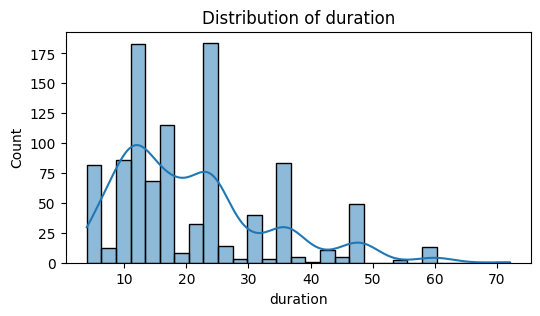

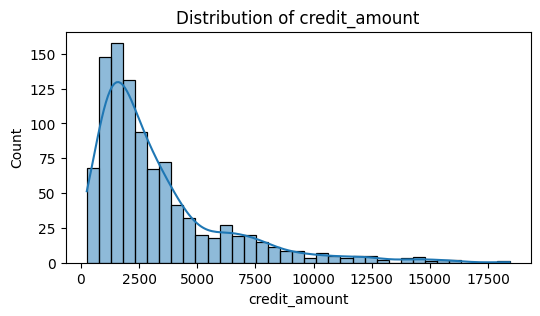

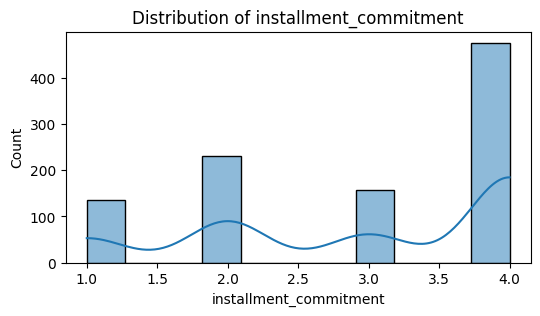

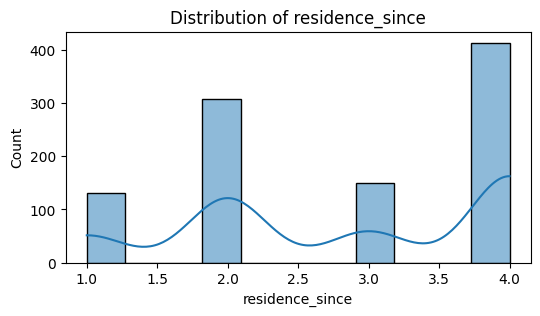

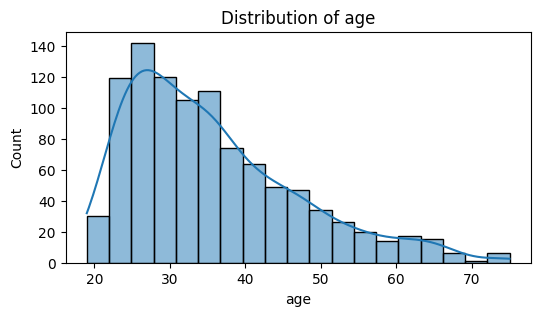

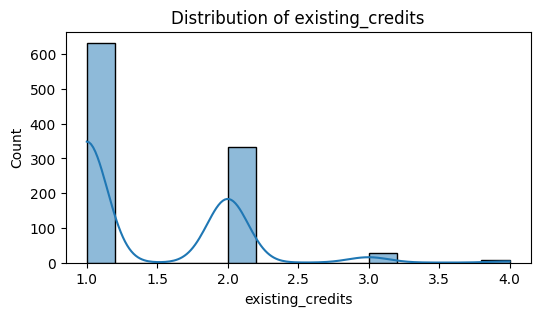

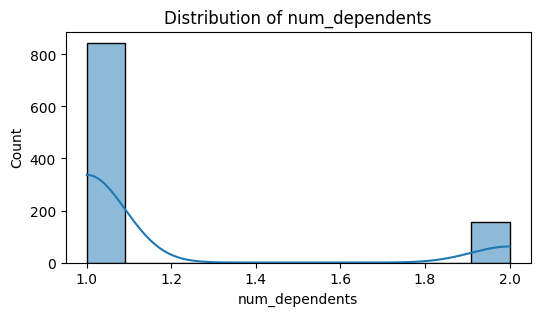

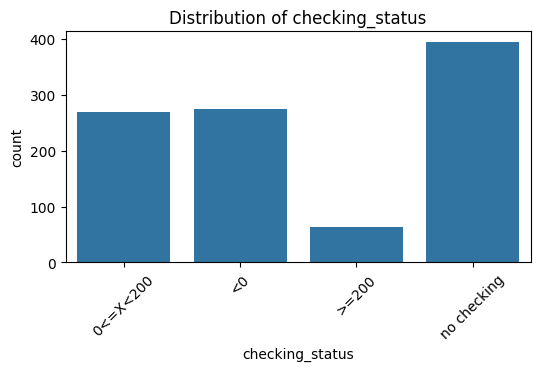

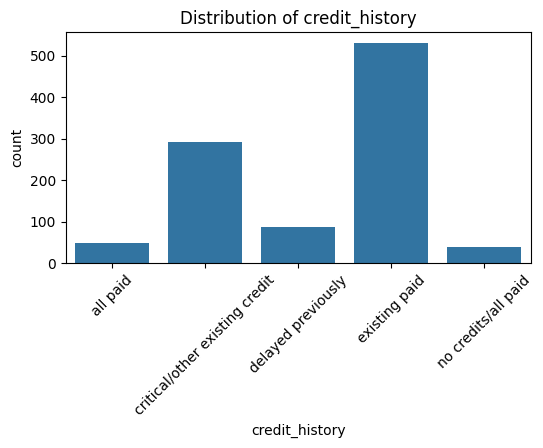

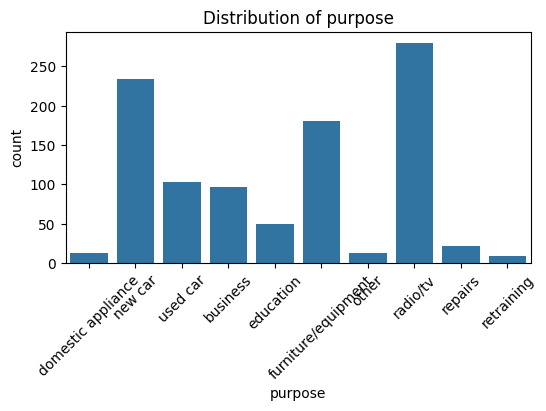

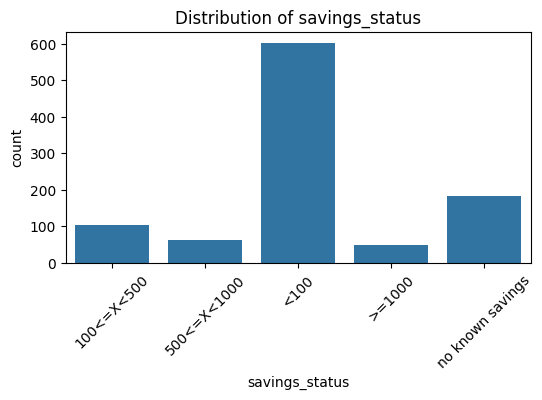

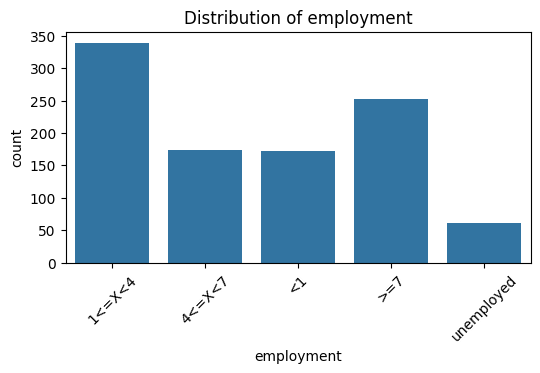

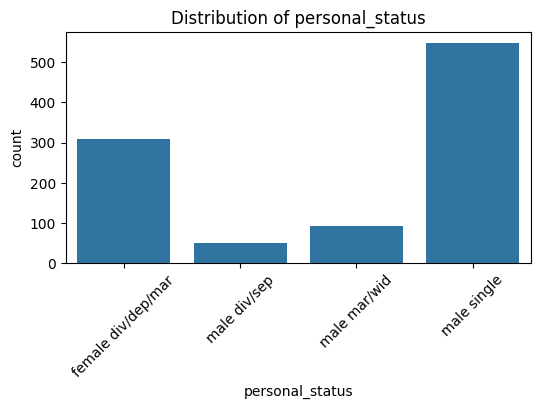

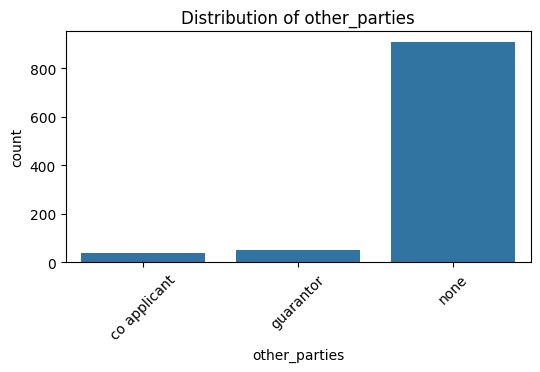

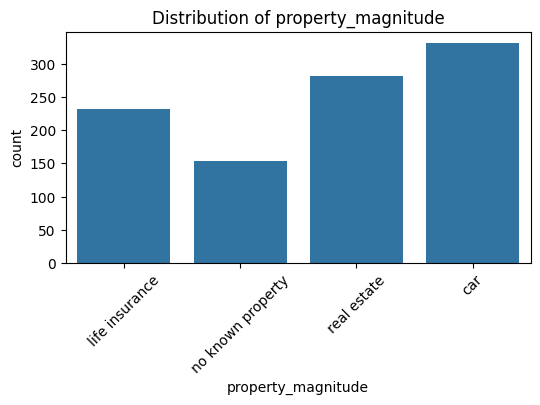

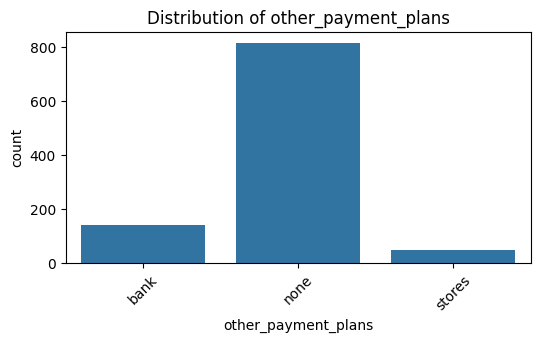

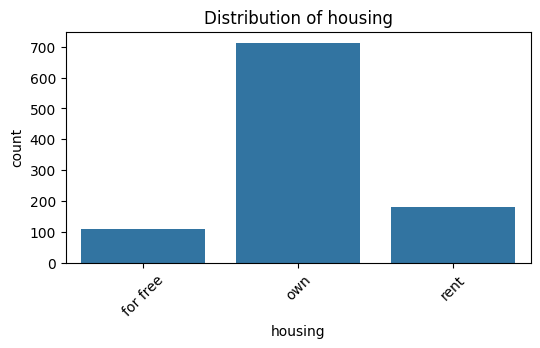

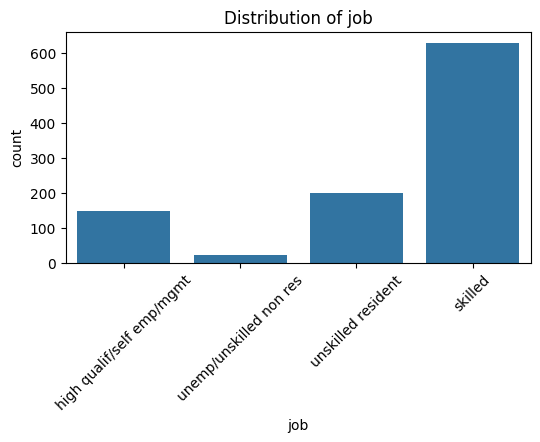

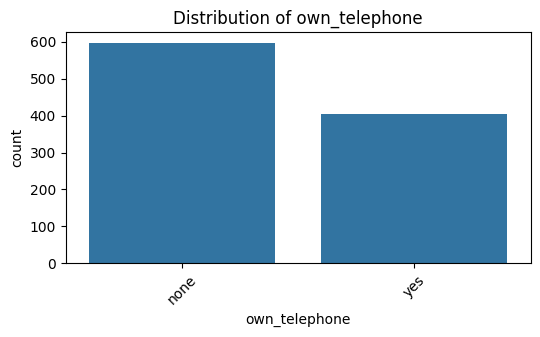

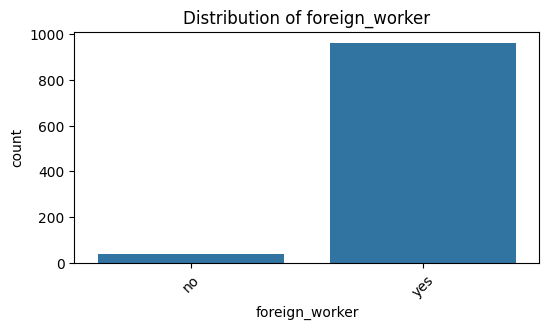

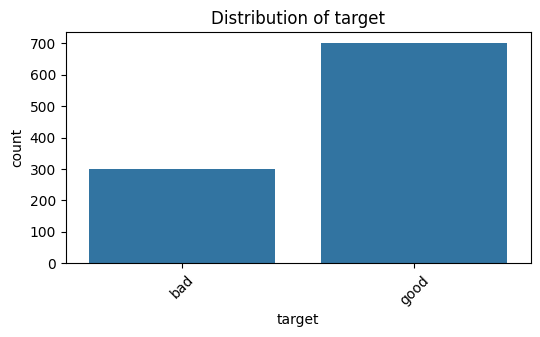

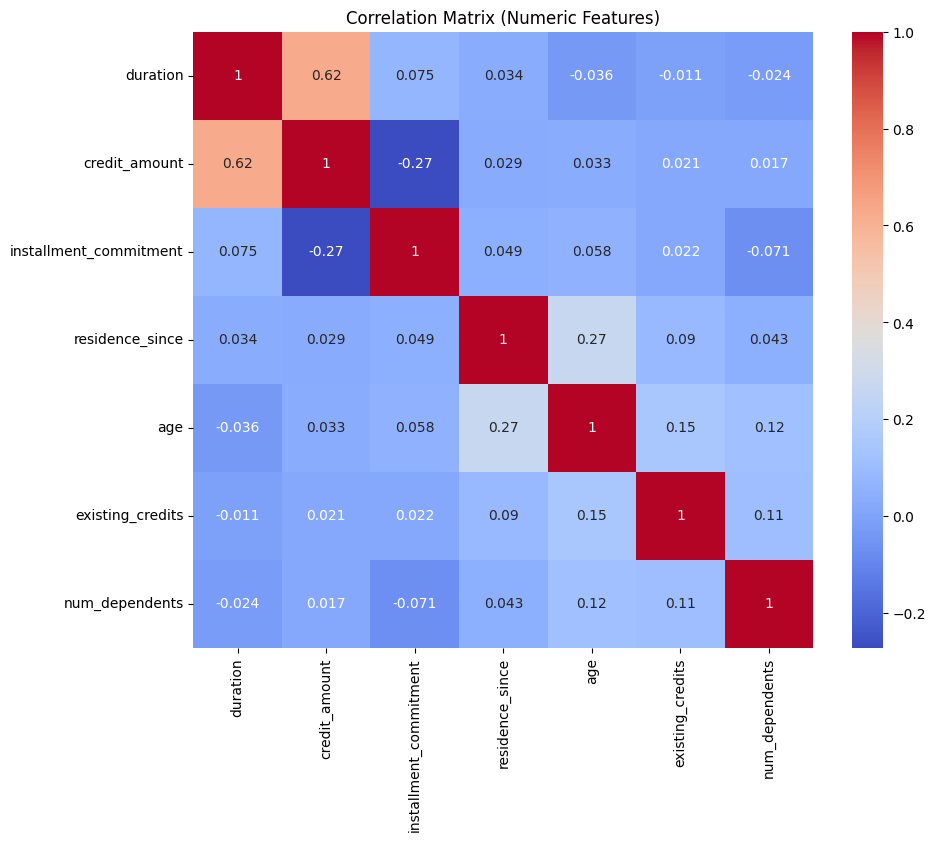

In [9]:
# German Credit Risk Dataset Analysis

# 1. Load dataset
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

credit = fetch_openml(name='credit-g', version=1, as_frame=True)
X, y = credit.data, credit.target

# Combine features and target
df = pd.concat([X, y.rename("target")], axis=1)

# Show first few rows
print(df.head())

# 2. Summary of target variable (Default %)
default_counts = df['target'].value_counts()
default_percent = df['target'].value_counts(normalize=True) * 100
print("Counts:\n", default_counts)
print("\nPercentages:\n", default_percent)

# 3. Summary statistics for numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_features].describe())

# 4. Feature distributions (histograms)
for col in numeric_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. Categorical feature distributions
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 6. Correlation matrix for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()



In [10]:
# 7. Automatic data profiling (requires ydata-profiling)

#profile = ProfileReport(df, title="German Credit Risk Dataset Profiling", explorative=True)
#profile.to_file("german_credit_risk_report.html")
#print("Profiling report saved as german_credit_risk_report.html")


#### Next steps
* Which features are most predictive of default

* Class imbalance handling

* Simple baseline classification model with feature importance analysis
